# Imports and Loading data

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Basic understanding of dataset

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train_data.select_dtypes(include=object).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [29]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Filling missing values

In [31]:
train_mean_ages = []
test_mean_ages = []

for n in range(1,4):
    train_mean_ages.append(int(train_data[train_data['Pclass'] == n]['Age'].mean()))
    test_mean_ages.append(int(test_data[test_data['Pclass'] == n]['Age'].mean()))


mean_ages = [int((train_mean_ages[n] + test_mean_ages[n]) / 2) for n in range(3)]

In [32]:
mean_ages

[39, 28, 24]

In [33]:
def fill_age(age, pclass):
    if pd.isnull(age):
        if pclass == 1:
            return mean_ages[0]
        elif pclass == 2:
            return mean_ages[1]
        elif pclass == 3:
            return mean_ages[2]
    else:
        return age

In [34]:
train_data['Age'] = np.vectorize(fill_age)(train_data['Age'], train_data['Pclass'])
test_data['Age'] = np.vectorize(fill_age)(test_data['Age'], test_data['Pclass'])

In [35]:
def cabin_presence(cabin):
    if pd.isna(cabin):
        return 0
    return 1

train_data['Cabin'] = np.vectorize(cabin_presence)(train_data['Cabin'])

In [36]:
test_data['Cabin'] = np.vectorize(cabin_presence)(test_data['Cabin'])

In [37]:
train_data['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [38]:
train_data = train_data.dropna()
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [39]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [40]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Getting rid of some features

In [41]:
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Visualizations

<AxesSubplot:>

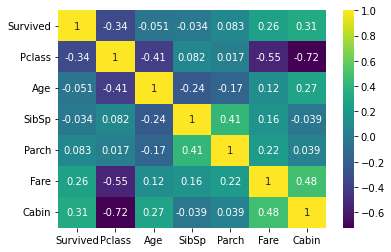

In [42]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

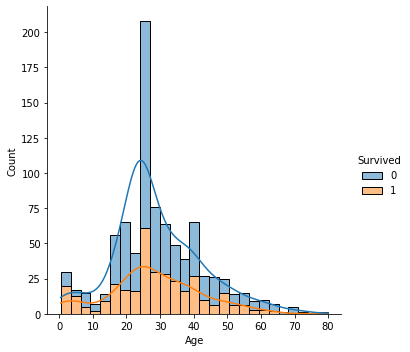

In [43]:
sns.displot(data=train_data, x='Age', hue='Survived', multiple='stack', kde=True)

# Scaling data with dummy variables

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
X = pd.get_dummies(train_data.drop('Survived', axis=1))
y = train_data['Survived']

test_data = pd.get_dummies(test_data)

In [46]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, random_state=101)

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_validation = scaler.transform(X_validation)
scaled_X_test = scaler.transform(test_data)

# Model selection

**Support Vector Machines**

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [49]:
svm = SVC(random_state=101)
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm,param_grid)

In [50]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(random_state=101),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [51]:
grid.best_score_

0.8132450331125828

In [52]:
grid.best_params_

{'C': 1, 'kernel': 'poly'}

In [53]:
svm_predictions = grid.predict(scaled_X_validation)

In [54]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [55]:
print(classification_report(y_validation, svm_predictions))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        76
           1       0.86      0.64      0.73        58

    accuracy                           0.80       134
   macro avg       0.81      0.78      0.79       134
weighted avg       0.81      0.80      0.79       134



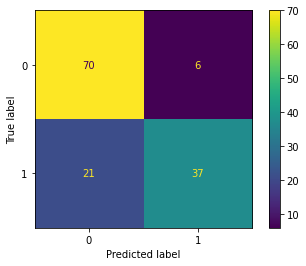

In [56]:
ConfusionMatrixDisplay.from_predictions(y_validation, svm_predictions)

In [57]:
print(f'SVM accuracy: {accuracy_score(y_validation, svm_predictions)}')

SVM accuracy: 0.7985074626865671


**K Nearest Neighbours**

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [59]:
k_values = list(range(1,20))
param_grid = {'n_neighbors': k_values}

In [60]:
full_cv_classifier = GridSearchCV(knn, param_grid, cv=5,scoring='accuracy')

In [61]:
full_cv_classifier.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [62]:
full_cv_classifier.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 2,
 'weights': 'uniform'}

In [63]:
knn_predictions = full_cv_classifier.predict(scaled_X_validation)

In [64]:
print(classification_report(y_validation, knn_predictions))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        76
           1       0.87      0.69      0.77        58

    accuracy                           0.82       134
   macro avg       0.83      0.81      0.81       134
weighted avg       0.83      0.82      0.82       134



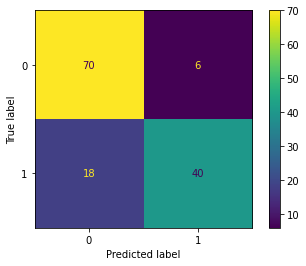

In [65]:
ConfusionMatrixDisplay.from_predictions(y_validation, knn_predictions)

In [66]:
print(f'KNN accuracy: {accuracy_score(y_validation, knn_predictions)}')

KNN accuracy: 0.8208955223880597


**Ensemble Models**

**Random Forest Classifier**

In [67]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=101)
grid = GridSearchCV(rfc,param_grid)

In [69]:
grid.fit(scaled_X_train, y_train)

c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\polcz\desktop\kaggle competitions\venv\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=T

GridSearchCV(estimator=RandomForestClassifier(random_state=101),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [70]:
grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 200, 'oob_score': True}

In [71]:
rfc_predictions = grid.predict(scaled_X_validation)

In [72]:
print(classification_report(y_validation, rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        76
           1       0.79      0.79      0.79        58

    accuracy                           0.82       134
   macro avg       0.82      0.82      0.82       134
weighted avg       0.82      0.82      0.82       134



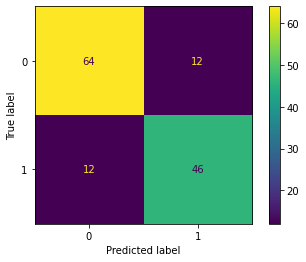

In [73]:
ConfusionMatrixDisplay.from_predictions(y_validation, rfc_predictions)

In [74]:
print(f'RFC accuracy: {accuracy_score(y_validation, rfc_predictions)}')

RFC accuracy: 0.8208955223880597


**GradientBoostingClassifier**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier(random_state=101)
grid = GridSearchCV(gb_model,param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [77]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 40}

In [78]:
gbc_predictions = grid.predict(scaled_X_validation)

In [79]:
print(classification_report(y_validation, gbc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        76
           1       0.85      0.79      0.82        58

    accuracy                           0.85       134
   macro avg       0.85      0.84      0.85       134
weighted avg       0.85      0.85      0.85       134



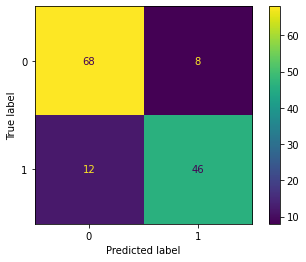

In [80]:
ConfusionMatrixDisplay.from_predictions(y_validation, gbc_predictions)

In [81]:
print(f'GBC accuracy: {accuracy_score(y_validation, gbc_predictions)}')

GBC accuracy: 0.8507462686567164


# Tuning GradientBoostingClassifier

In [82]:
param_grid = {"n_estimators": np.arange(20, 80, 5),'max_depth':[4]}
gb_model = GradientBoostingClassifier(random_state=101)
grid = GridSearchCV(gb_model,param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'max_depth': [4],
                         'n_estimators': array([20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])})

In [83]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 40}

In [84]:
param_grid = {"n_estimators": np.arange(30, 51),'max_depth':[4]}
gb_model = GradientBoostingClassifier(random_state=101)
grid = GridSearchCV(gb_model,param_grid)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=101),
             param_grid={'max_depth': [4],
                         'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50])})

In [85]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 38}

In [86]:
gbc_predictions = grid.predict(scaled_X_validation)

In [87]:
print(classification_report(y_validation, gbc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        76
           1       0.84      0.79      0.81        58

    accuracy                           0.84       134
   macro avg       0.84      0.84      0.84       134
weighted avg       0.84      0.84      0.84       134



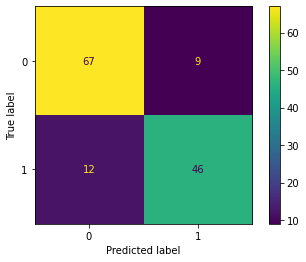

In [88]:
ConfusionMatrixDisplay.from_predictions(y_validation, gbc_predictions)

In [89]:
print(f'Tuned GBC accuracy: {accuracy_score(y_validation, gbc_predictions)}')

Tuned GBC accuracy: 0.8432835820895522


# Final Model

In [90]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


In [91]:
final_model = GradientBoostingClassifier(max_depth = 4, n_estimators = 40)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

final_model.fit(scaled_X, y)

GradientBoostingClassifier(max_depth=4, n_estimators=40)

In [92]:
final_predictions = final_model.predict(scaled_X_test)

# Model Deployment

In [93]:
passengerId = pd.read_csv("test.csv")['PassengerId']
passengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [95]:
output = pd.DataFrame({'PassengerId': passengerId, 'Survived': final_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
